In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input

In [7]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [13]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

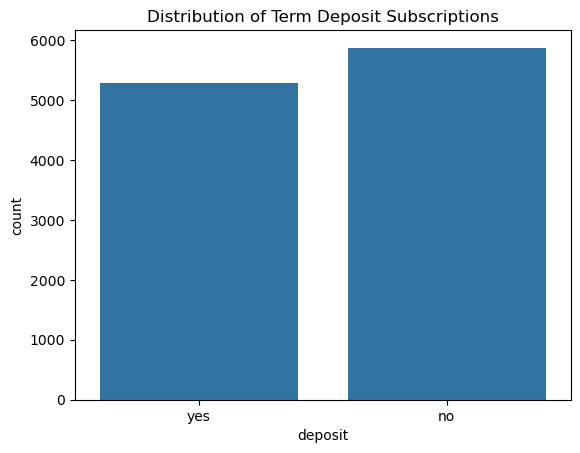

In [15]:
sns.countplot(x='deposit', data=df)
plt.title('Distribution of Term Deposit Subscriptions')
plt.show()

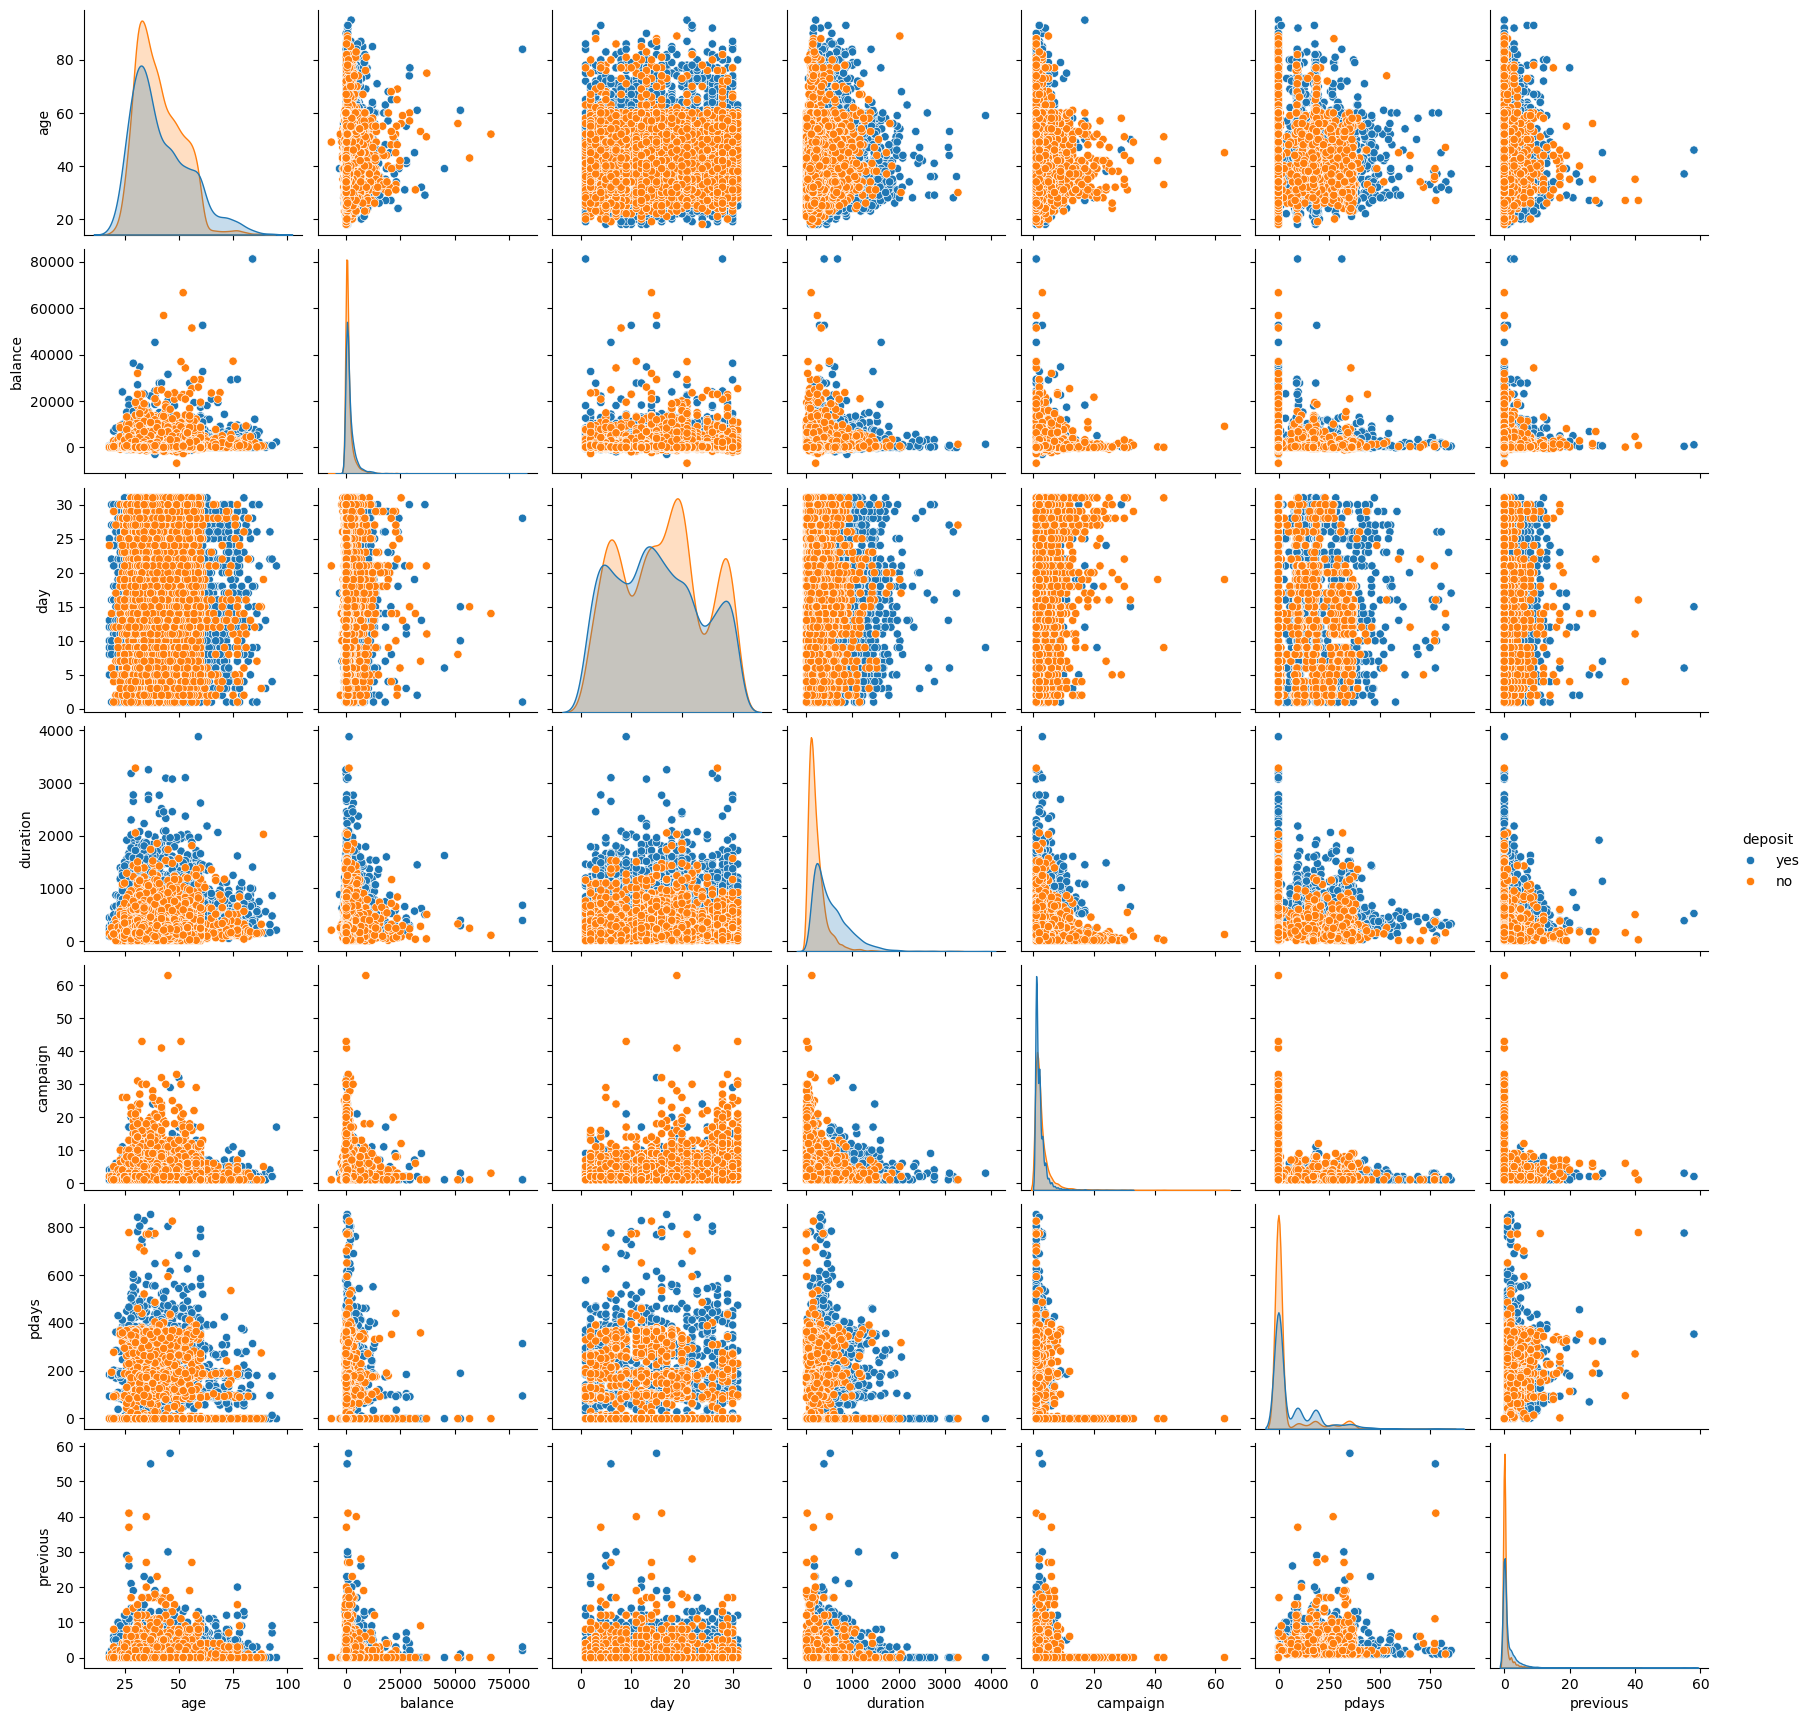

In [17]:
sns.pairplot(df, hue='deposit')
plt.show()

In [21]:
df.ffill(inplace=True)

In [23]:
df = pd.get_dummies(df, drop_first=True)

In [29]:
X = df.drop('balance', axis=1)
y = df['balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [39]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])   

In [43]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0104 - loss: -5780.4165 - val_accuracy: 0.0045 - val_loss: -56165.4023
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0027 - loss: -125898.8047 - val_accuracy: 0.0045 - val_loss: -470487.1562
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0025 - loss: -728747.6250 - val_accuracy: 0.0045 - val_loss: -1741678.7500
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0042 - loss: -2226253.7500 - val_accuracy: 0.0045 - val_loss: -4225717.0000
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0036 - loss: -5001391.0000 - val_accuracy: 0.0045 - val_loss: -8228899.0000
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0036 - loss: -9187490.0000 - val_accuracy: 0.0045 - val_loss: -14017283.0000
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0033 - loss: -15313233.0000 - val_accuracy: 0.0045 - val_loss: -21809508.0000
Epoch 8/50

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')   

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0026 - loss: -4024679168.0000
Test Accuracy: 0.002686968306079507


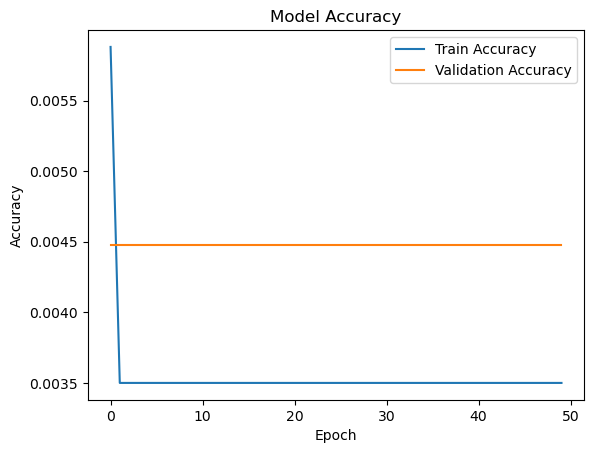

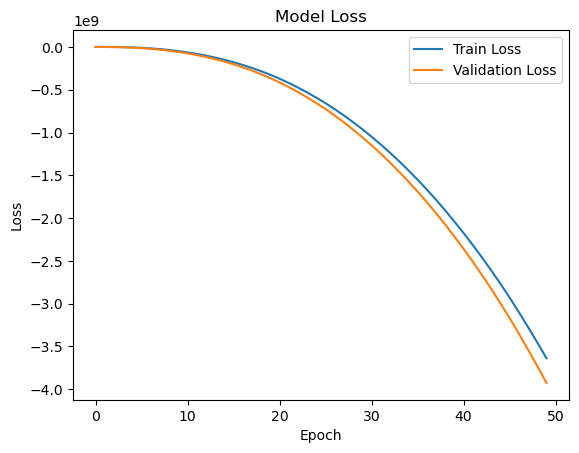

In [48]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()